<a href="https://colab.research.google.com/github/pathananas2007/obesity-prediction-ml/blob/main/drug_prediction_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


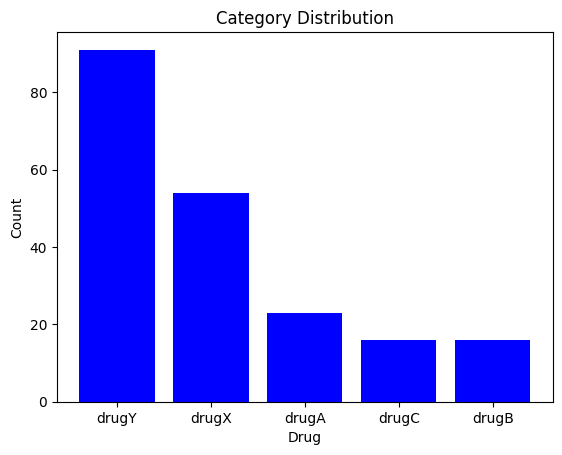

In [45]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
data=pd.read_csv(path)
data
data.info()
label_encoder=LabelEncoder()
data['Sex']=label_encoder.fit_transform(data['Sex'])
data['BP']=label_encoder.fit_transform(data['BP'])
data['Cholesterol']=label_encoder.fit_transform(data['Cholesterol'])
data
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
data['Drug_num'] =data['Drug'].map(custom_map)
data
category_counts = data['Drug'].value_counts()
data
plt.bar(category_counts.index,category_counts.values,color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')

plt.show()


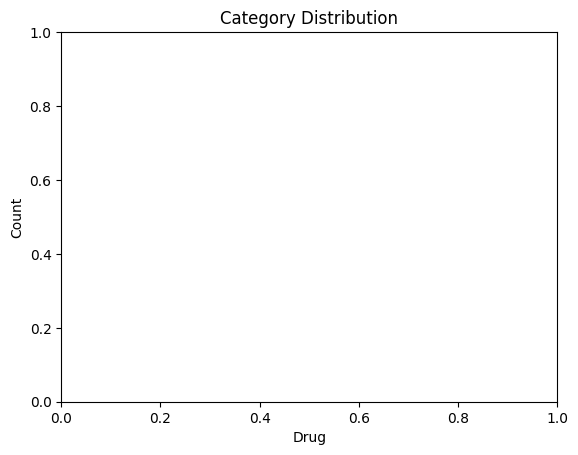

In [42]:
y = data['Drug']
X = data.drop(['Drug','Drug_num'], axis=1)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
tree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [37]:
tree_predictions = tree.predict(X_testset)

In [38]:
print('Decision Trees Accurace',metrics.accuracy_score(y_testset,tree_predictions))

Decision Trees Accurace 0.9833333333333333


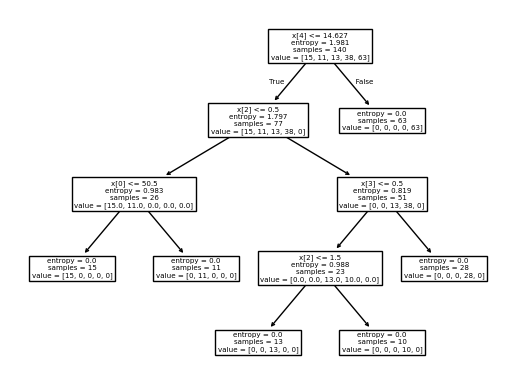

In [43]:
plot_tree(tree)
plt.show()